In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('C:/Users/Tarun/Downloads/pde/csse_covid_19_time_series/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389


In [4]:
deaths_reported = pd.read_csv('C:/Users/Tarun/Downloads/pde/csse_covid_19_time_series/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2521,2521,2521,2529,2529,2532,2533,2535,2539,2539
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2304,2310,2317,2321,2326,2331,2335,2337,2340,2342
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3123,3126,3130,3134,3137,3141,3144,3148,3152,3155
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,120,120,120,121,121,121,121,123,123,123
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,549,550,553,554,554,557,557,560,561,561


In [6]:
recovered_cases = pd.read_csv('C:/Users/Tarun/Downloads/pde/csse_covid_19_time_series/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51961,51962,51989,52005,52013,52022,52083,52105,52116,52168
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,96672,97206,97723,98269,98903,99441,100013,100600,101142,101584
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,82392,82493,82600,82704,82813,82929,83048,83169,83286,83397
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11732,11770,11825,11890,11932,11989,11989,12105,12159,12203
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21589,21890,22058,22093,22115,22144,22175,22203,22576,22597


In [8]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/9/21', '4/10/21', '4/11/21', '4/12/21', '4/13/21', '4/14/21',
       '4/15/21', '4/16/21', '4/17/21', '4/18/21'],
      dtype='object', length=457)

In [9]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [10]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21
0,0,0,0,0,0,0,0,0,0,0,...,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793
1,0,0,0,0,0,0,0,0,0,0,...,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594
2,0,0,0,0,0,0,0,0,0,0,...,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642
3,0,0,0,0,0,0,0,0,0,0,...,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805
4,0,0,0,0,0,0,0,0,0,0,...,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,...,2683,2692,2693,2705,2714,2733,2758,2772,2781,2785
270,0,0,0,0,0,0,0,0,0,0,...,264395,265897,268132,270856,272767,274690,276407,278135,279753,280741
271,0,0,0,0,0,0,0,0,0,0,...,5233,5276,5357,5446,5507,5582,5657,5715,5770,5812
272,0,0,0,0,0,0,0,0,0,0,...,89783,89918,90029,90064,90218,90389,90532,90750,90844,90918


In [11]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
india_recoveries = [] 



In [12]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Cina'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())




In [13]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958602,
 1041662,
 1125221,
 1183584,
 1256176,
 1329331,
 1399162,
 1482540,
 1569554,
 1655088,
 1729371,
 1849067,
 1919809,
 2003820,
 2080934,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772018,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

In [14]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3349,
 3460,
 3564,
 3803,
 3993,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7967,
 8874,
 9985,
 11470,
 13192,
 14877,
 16826,
 19116,
 21926,
 24961,
 28449,
 32179,
 35698,
 39779,
 44527,
 50526,
 56413,
 62573,
 68489,
 73675,
 79613,
 87874,
 94680,
 102464,
 109841,
 116014,
 121872,
 127842,
 134811,
 143277,
 150536,
 158929,
 165081,
 170313,
 176187,
 183462,
 190318,
 197153,
 203921,
 209548,
 213527,
 218273,
 224854,
 231576,
 237419,
 242566,
 248062,
 251572,
 255784,
 261611,
 268114,
 273422,
 278972,
 283196,
 286753,
 290240,
 295726,
 300869,
 306030,
 311253,
 315430,
 318614,
 322377,
 327025,
 331803,
 336465,
 341712,
 345635,
 348649,
 349861,
 354103,
 359158,
 363716,
 368325,


In [15]:
confirmed_sum

141404998

In [16]:
death_sum

3019330

In [17]:
recovered_sum

80775118

In [18]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 55,
 74,
 107,
 184,
 237,
 403,
 519,
 594,
 782,
 1147,
 1586,
 2219,
 2978,
 3212,
 4679,
 6512,
 9169,
 13663,
 20030,
 26025,
 34898,
 46136,
 56755,
 68837,
 86693,
 105383,
 125013,
 143912,
 165987,
 192301,
 224560,
 256792,
 289087,
 321477,
 351354,
 382747,
 413516,
 444731,
 480667,
 515081,
 544183,
 571440,
 598380,
 627205,
 652611,
 682626,
 715656,
 743588,
 769684,
 799512,
 825429,
 854288,
 887858,
 920185,
 950581,
 977082,
 1000785,
 1025362,
 1051800,
 1081020,
 1115946,
 1143296,
 1167593,
 1191678,
 1216209,
 1240769,
 1268180,
 1295019,
 1320155,
 1339022,
 1358293,
 1381241,
 1401649,
 1428467,
 1453214,
 1477373,
 1495736,
 1518126,
 1539133,
 1561830,
 1587596,
 1611253,
 1632364,
 1652431,
 1671104,
 1690754,
 1709303,
 1731625,
 1756098,
 1779731,
 1798718,
 1816154,
 

In [19]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [20]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d

In [21]:
#confirmed cases

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
itlay_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [22]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301,
 388,
 444,
 442,
 0,
 0,
 1244,
 341,
 383,
 543,
 852,
 0,
 0

In [23]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595,
 927,
 380,
 755,
 519,
 617,
 182,
 1227,
 695,
 548,
 689,
 276,
 342,
 272,
 600,
 324,
 672,
 726,
 267,
 221,
 184,
 285,
 242,
 351,
 452,
 526,
 300,
 359,
 397,
 16,
 169,
 535,
 41,
 251,
 164,
 570,
 352,
 1213,
 482,
 371,
 602,
 496,
 712,
 391,
 500,
 665,
 422,
 235,
 349,
 376,
 475,
 477,
 410,
 418,
 325,
 541,
 279,
 356,
 302,
 331,
 3

In [24]:
#deaths

world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
itlay_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [25]:
china_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [26]:
uk_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 19,
 14,
 23,
 17,
 35,
 46,
 32,
 58,
 35,
 76,
 148,
 191,
 182,
 288,
 292,
 213,
 374,
 404,
 673,
 657,
 737,
 757,
 601,
 570,
 1105,
 1032,
 1117,
 1123,
 844,
 657,
 725,
 1080,
 884,
 1040,
 914,
 1108,
 433,
 576,
 1224,
 857,
 684,
 1018,
 816,
 364,
 323,
 971,
 771,
 636,
 700,
 585,
 253,
 273,
 725,
 647,
 458,
 580,
 275,
 217,
 188,
 615,
 448,
 353,
 351,
 411,
 67,
 146,
 501,
 329,
 273,
 291,
 220,
 379,
 104,
 131,
 422,
 343,
 274,
 154,
 60,
 86,
 250,
 254,
 130,
 258,
 143,
 54,
 47,
 197,
 164,
 76,
 131,
 107,
 27,
 29,
 120,
 110,
 67,
 84,
 71,
 31,
 13,
 94,
 87,
 99,
 77,
 40,
 31,
 21,
 54,
 97,
 41,
 49,
 32,
 19,
 11,
 54,
 57,
 31,
 34,
 17,
 9,
 10,
 44,
 26,
 24,
 26,
 9,
 11,
 10,
 25,
 17,
 9,
 32,
 15,
 8,
 3,
 21,
 34,
 0,
 20,
 13,
 5,
 1

In [27]:
#recoveries

world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
itlay_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery= daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [28]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [29]:
world_daily_recovery

[30,
 2,
 7,
 3,
 14,
 9,
 43,
 19,
 18,
 80,
 62,
 189,
 151,
 230,
 272,
 363,
 524,
 600,
 629,
 702,
 737,
 467,
 1143,
 1763,
 1339,
 1470,
 1717,
 1769,
 1769,
 2058,
 713,
 3997,
 505,
 1833,
 2678,
 2481,
 2892,
 3432,
 3071,
 2936,
 2884,
 2626,
 2942,
 2626,
 2068,
 2494,
 2337,
 1799,
 1907,
 2598,
 1323,
 1927,
 2372,
 3411,
 2055,
 2744,
 2487,
 1641,
 2445,
 4247,
 6217,
 468,
 9639,
 5779,
 8372,
 8785,
 8511,
 9456,
 15337,
 13590,
 15272,
 17143,
 15422,
 20412,
 13836,
 16709,
 23262,
 28882,
 25254,
 21738,
 26250,
 19383,
 27257,
 25074,
 36539,
 30883,
 26184,
 23866,
 31783,
 22178,
 34802,
 30085,
 28730,
 50029,
 27755,
 28812,
 27884,
 33212,
 42077,
 65116,
 38157,
 40651,
 32533,
 34086,
 36473,
 46119,
 39525,
 36413,
 53441,
 33809,
 46885,
 37042,
 55872,
 39711,
 48103,
 56411,
 41008,
 52916,
 52052,
 58970,
 51220,
 108547,
 54834,
 55527,
 63729,
 55152,
 63327,
 66863,
 77265,
 70450,
 76384,
 54925,
 104112,
 79091,
 70070,
 69165,
 72204,
 55109,
 1

In [30]:
#unique_countries = list(latest_data['Country_Region'].unique())
#unique_countries

In [31]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [32]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [33]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [34]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [35]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)

In [36]:
len(X_train_confirmed)

339

In [37]:
X_train_confirmed = X_train_confirmed[:250]

In [38]:
len(X_train_confirmed)

250

In [39]:
len(y_train_confirmed)

339

In [40]:
y_train_confirmed = y_train_confirmed[:250]

In [41]:
len(y_train_confirmed)

250

In [42]:
len(X_test_confirmed)

114

In [43]:
len(y_test_confirmed)

114

In [44]:
#transform our data for polynomial regression

poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [45]:
#polynomail regression

linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 6575920.270418998
MSE: 51286817390429.914


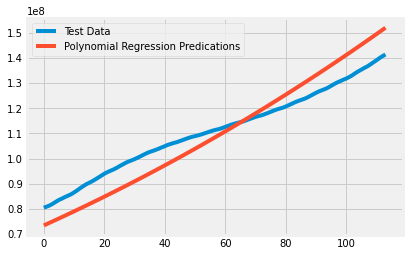

In [46]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predications'])

In [47]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=False, kernel='poly',gamma=0.11,epsilon=1,degree=3, C=10)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\Tarun\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MAE: 36970105.02091747
MSE: 1778249363462131.8


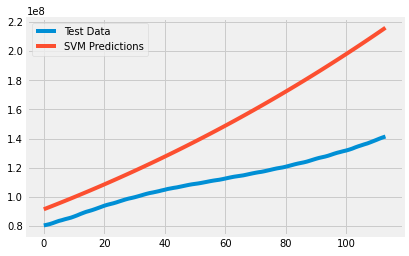

In [48]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred,y_test_confirmed))

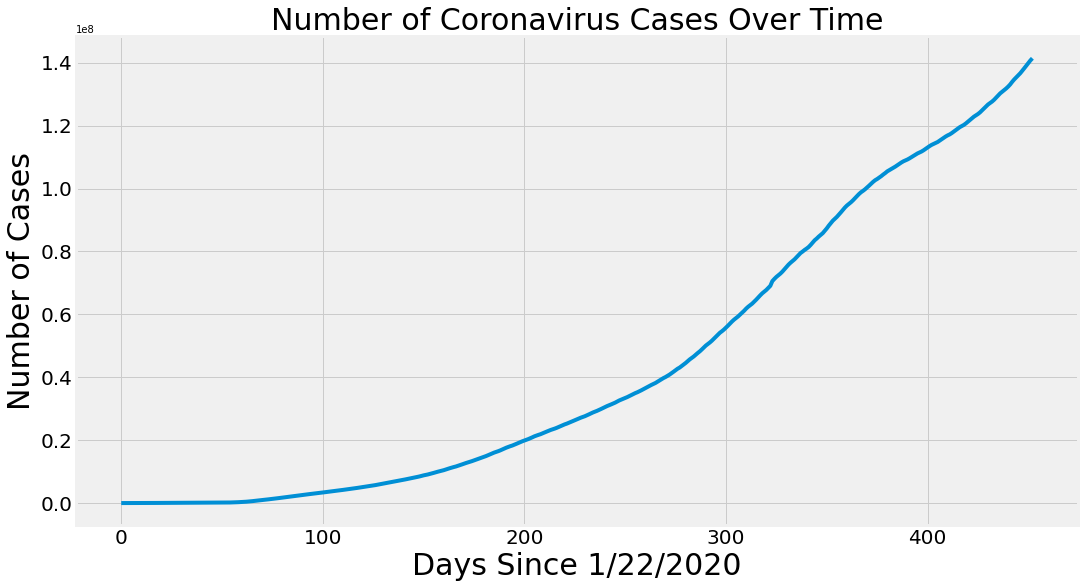

In [49]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

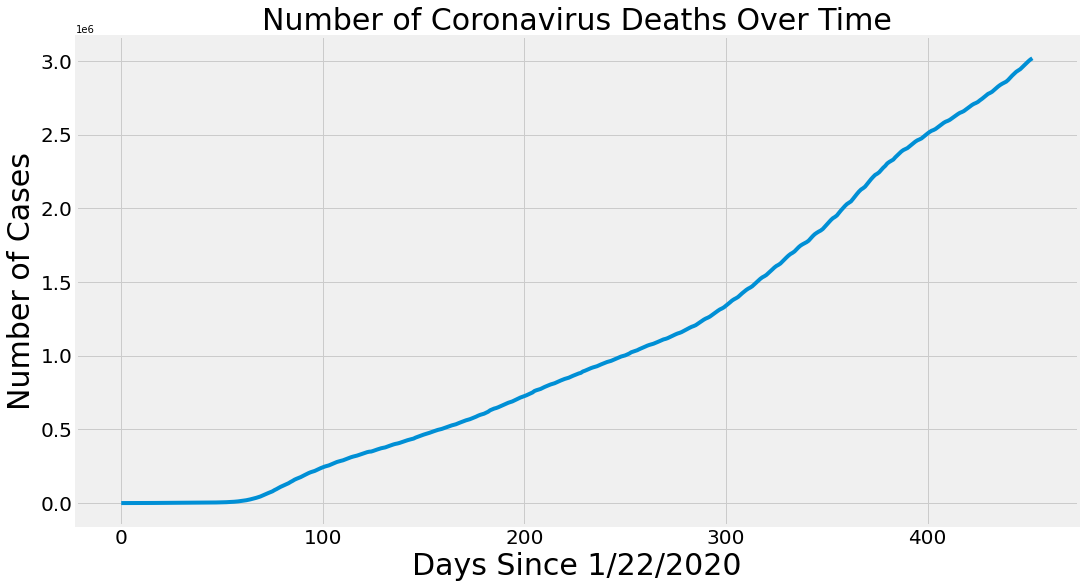

In [50]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

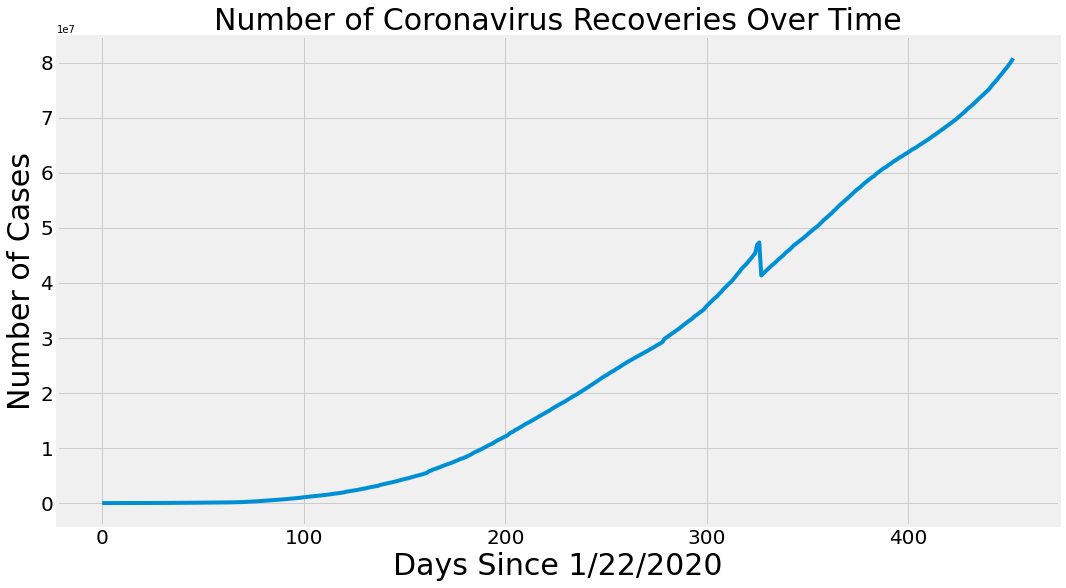

In [51]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

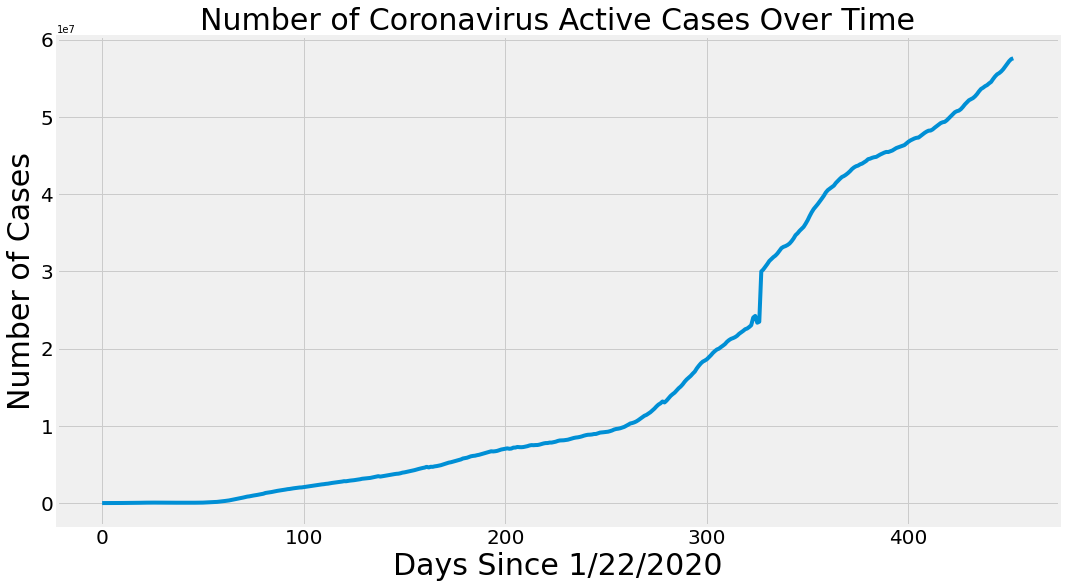

In [52]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

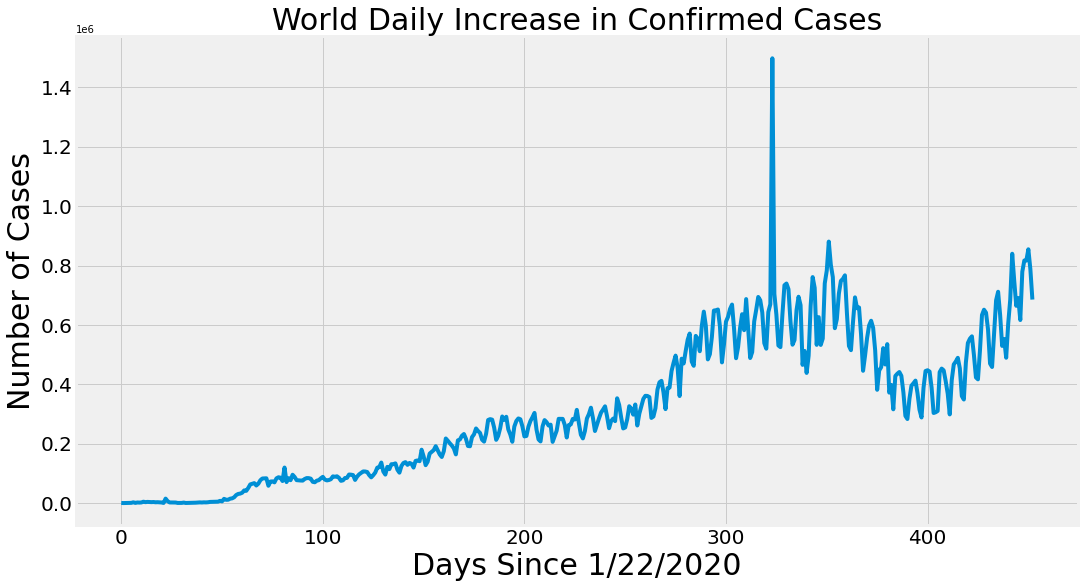

In [53]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, world_daily_increase)
plt.title('World Daily Increase in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

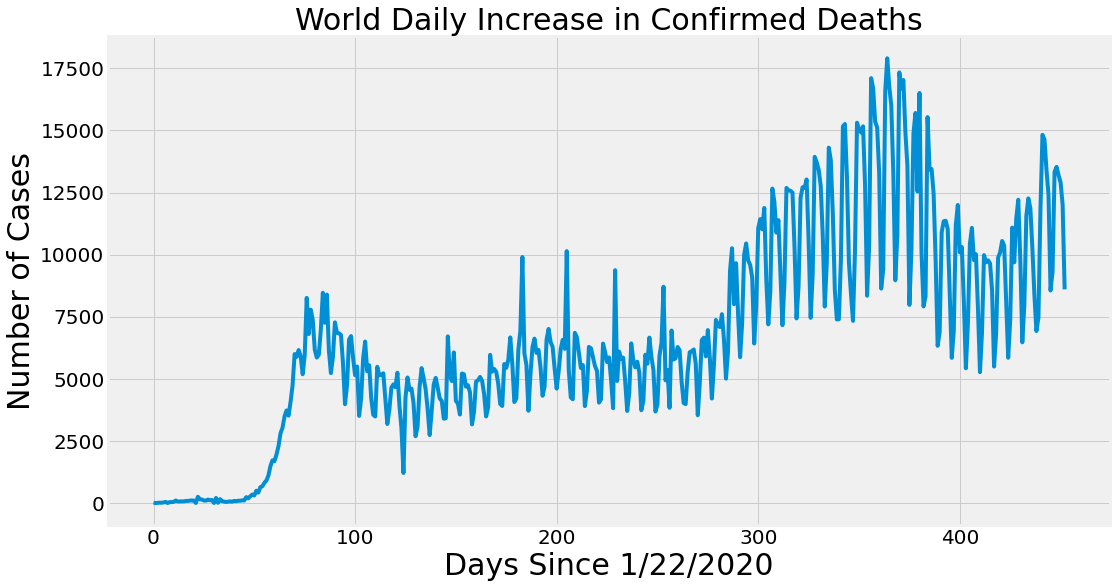

In [54]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, world_daily_death)
plt.title('World Daily Increase in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

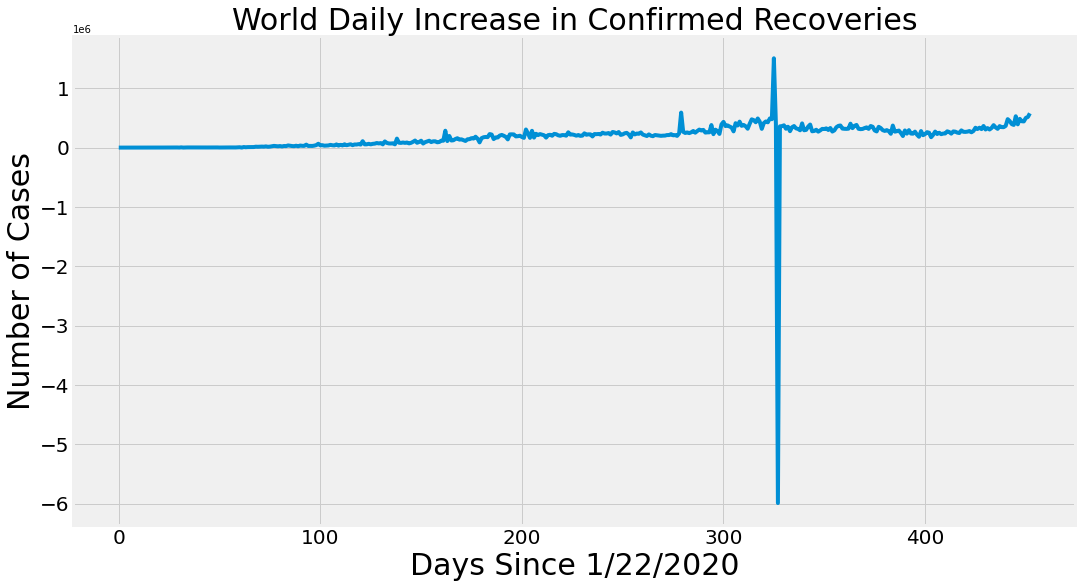

In [55]:
plt.figure(figsize = (16,9))
plt.plot(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increase in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [56]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time',size=30)
    plt.xlabel('Days Since 1/22/2020',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.legend(['Confirmed Cases',algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

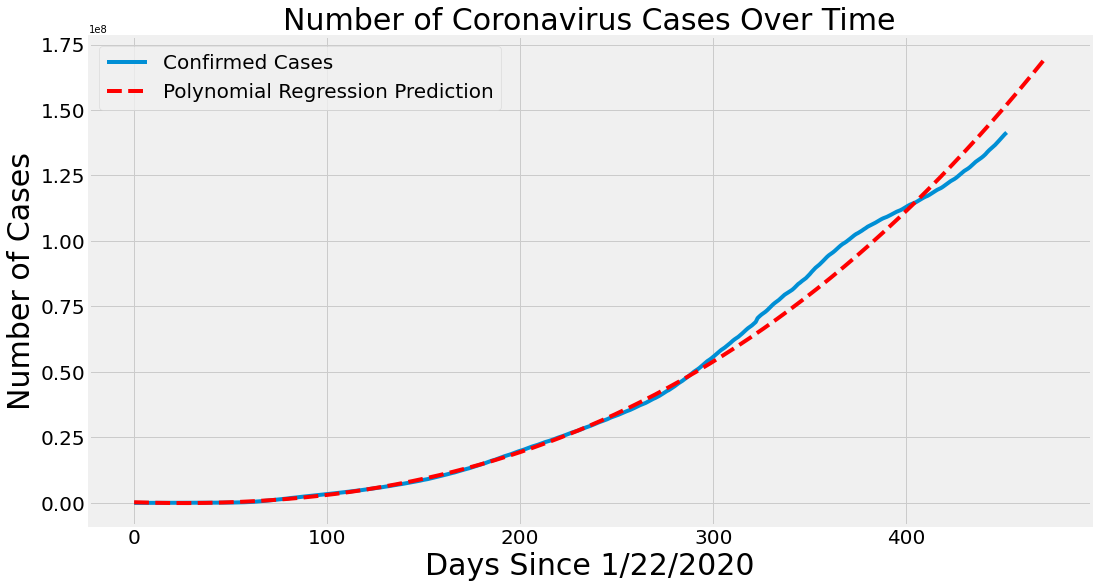

In [57]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Prediction','red')

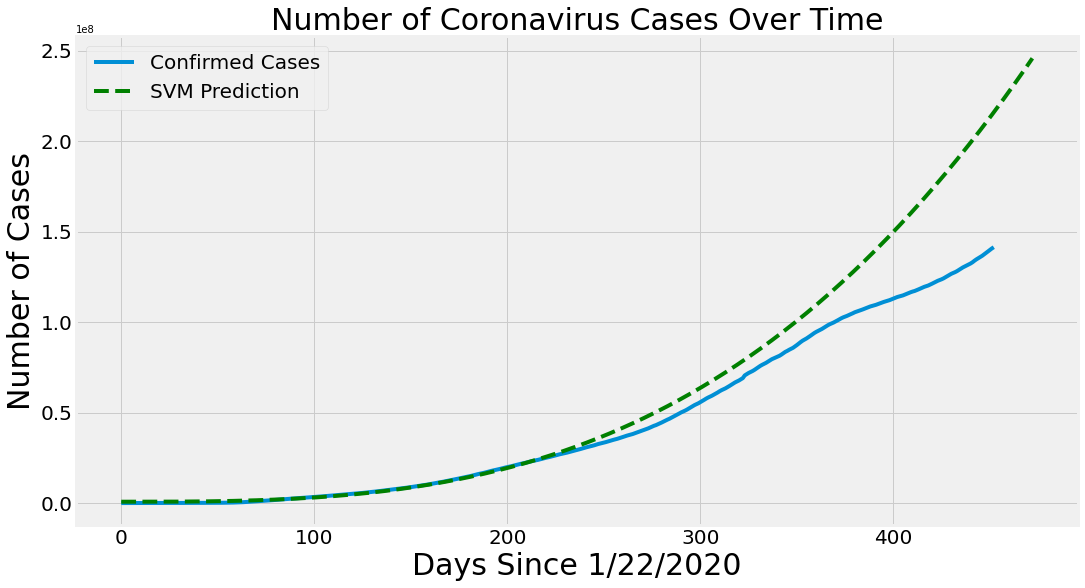

In [82]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Prediction','green')

In [81]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
type(linear_pred)
poly_df = pd.DataFrame({'Data': future_forecast_dates[-20:], 'Predicted number of confirmed Cases Worldwide': np.round(linear_pred[440:460])})
poly_df

,Data,Predicted number of confirmed Cases Worldwide
0,04/19/2021,141978999.0
1,04/20/2021,142800129.0
2,04/21/2021,143624213.0
3,04/22/2021,144451256.0
4,04/23/2021,145281263.0
5,04/24/2021,146114238.0
6,04/25/2021,146950186.0
7,04/26/2021,147789111.0
8,04/27/2021,148631019.0
9,04/28/2021,149475913.0


In [60]:
len(svm_pred)

473

In [74]:
# Future prediction using SVM
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:],'SVM Predicted # of cases Worldwide': np.round(svm_pred[390:410])})
svm_df

,Date,SVM Predicted # of cases Worldwide
0,04/19/2021,138992843.0
1,04/20/2021,140059029.0
2,04/21/2021,141130682.0
3,04/22/2021,142207817.0
4,04/23/2021,143290447.0
5,04/24/2021,144378587.0
6,04/25/2021,145472251.0
7,04/26/2021,146571452.0
8,04/27/2021,147676205.0
9,04/28/2021,148786523.0


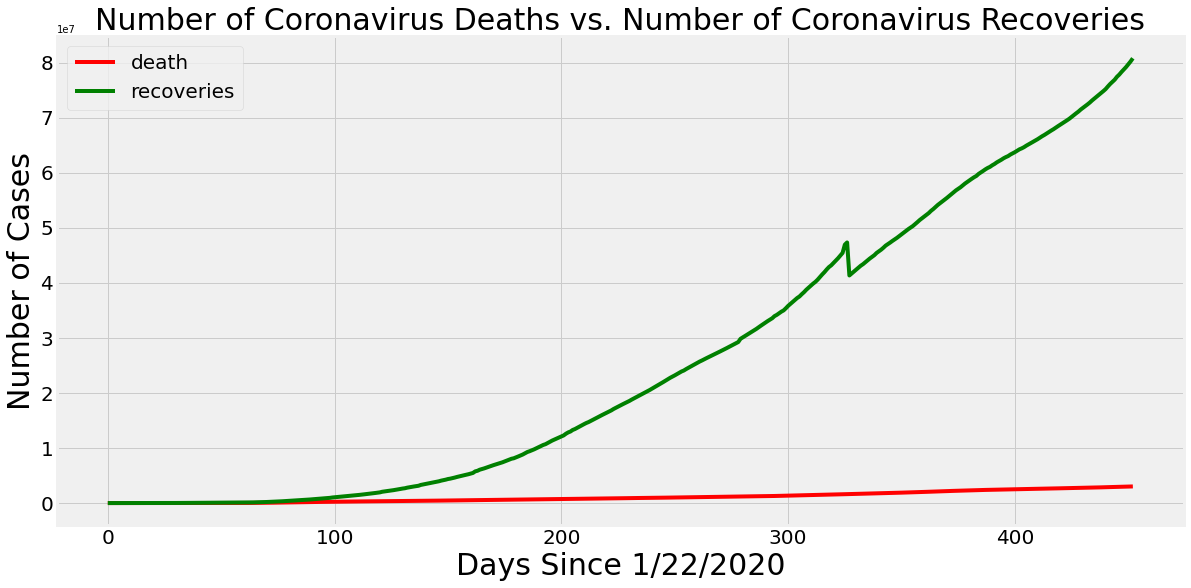

In [85]:
plt.figure(figsize=(18,9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death','recoveries'],loc='best',fontsize=20)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

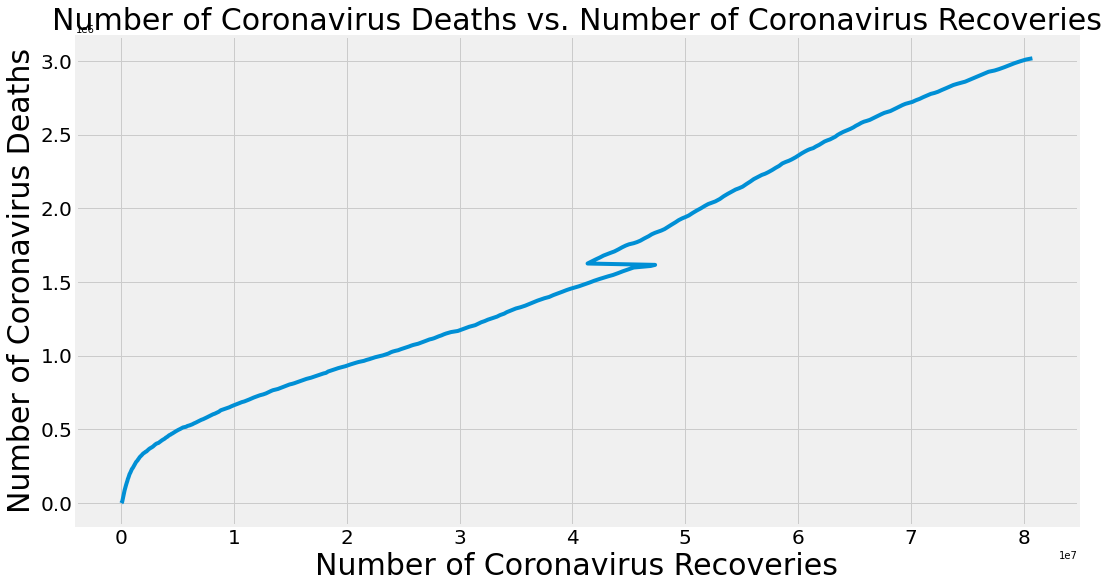

In [63]:
plt.figure(figsize=(16,9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries',size=30)
plt.ylabel('Number of Coronavirus Deaths',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [64]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16,9))
    plt.plot(x,y1)
    plt.title('{} Confirmed Cases'.format(country),size=30)
    plt.xlabel('Days Since 1/22/2020',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y2)
    plt.title('{} Daliy Increase in Confirmed Cases'.format(country),size=30)
    plt.xlabel('Days Since 1/22/2020',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y3)
    plt.title('{} Daliy Increase in Deaths'.format(country),size=30)
    plt.xlabel('Days Since 1/22/2020',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y4)
    plt.title('{} Daliy Increase in Recoveries'.format(country),size=30)
    plt.xlabel('Days Since 1/22/2020',size=30)
    plt.ylabel('Number of Cases',size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

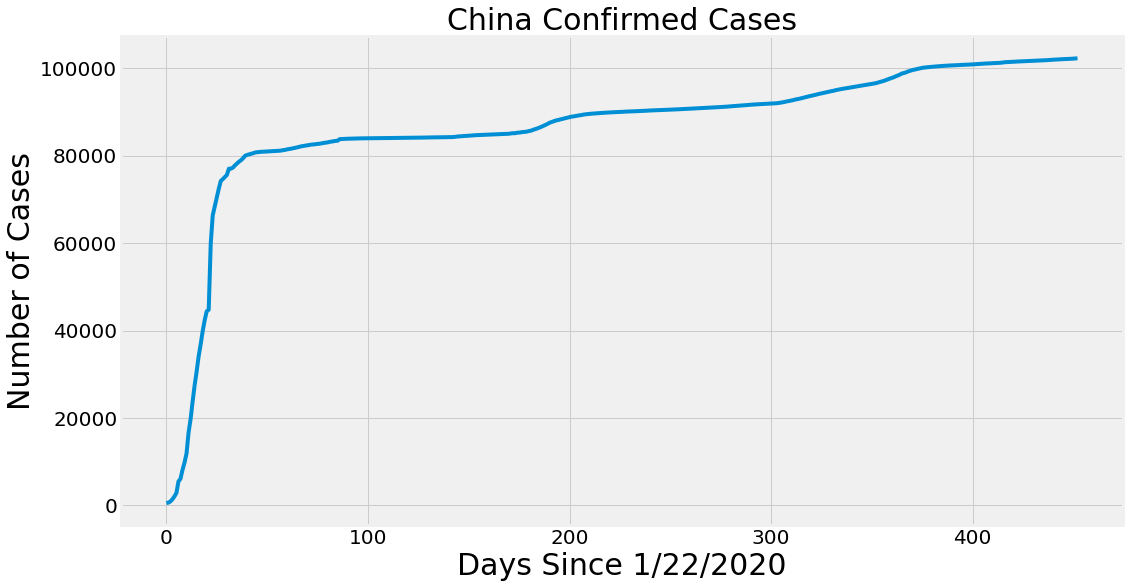

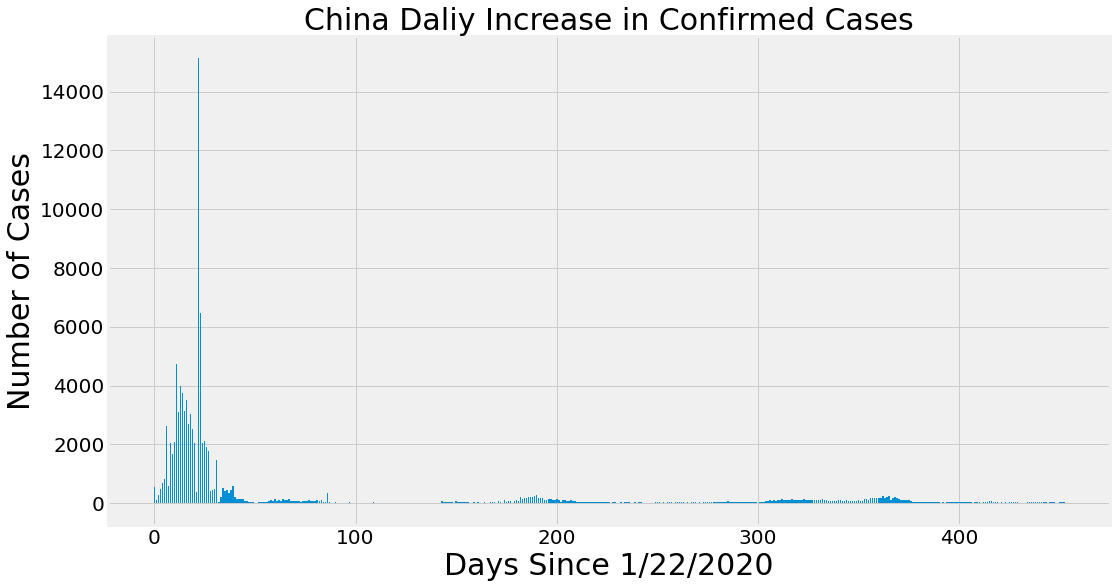

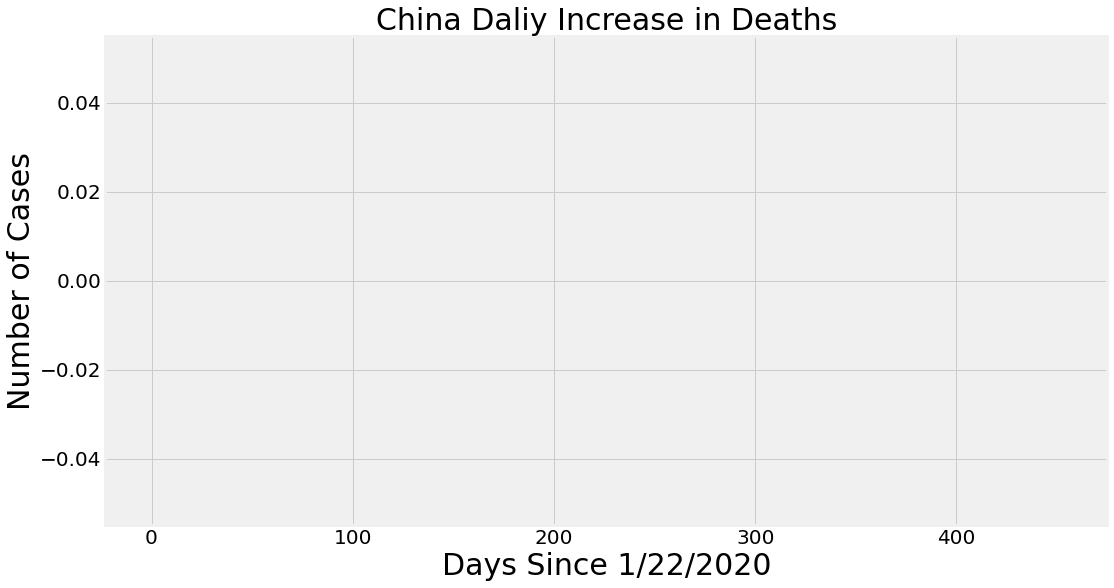

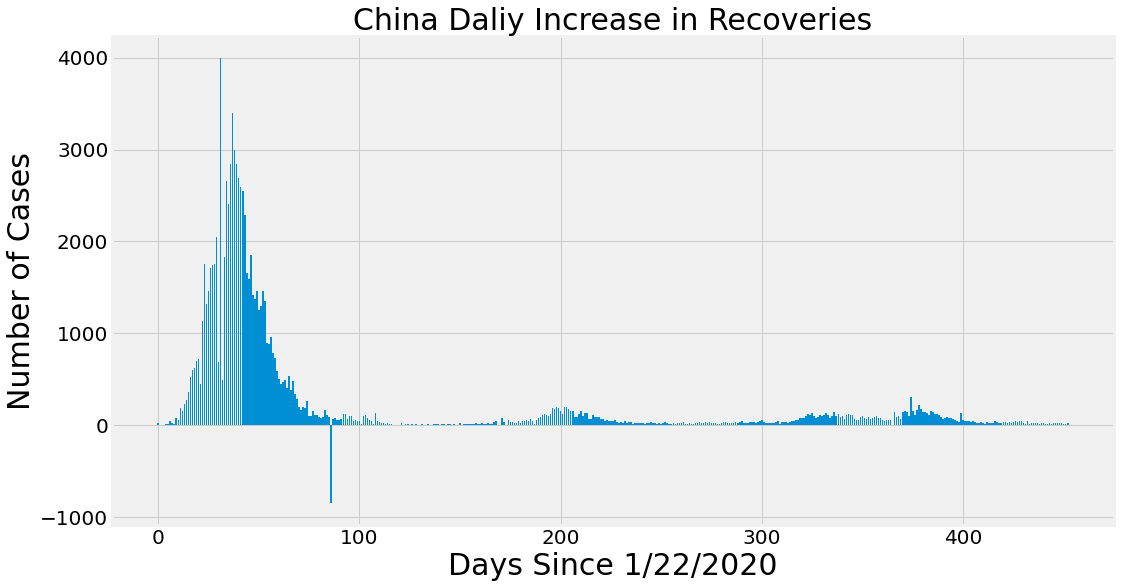

In [65]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

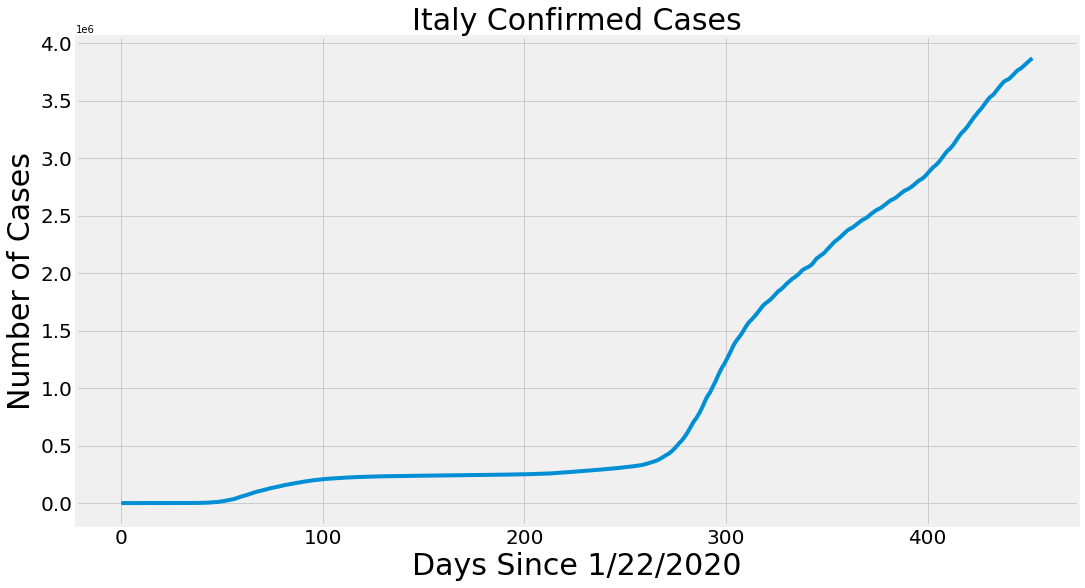

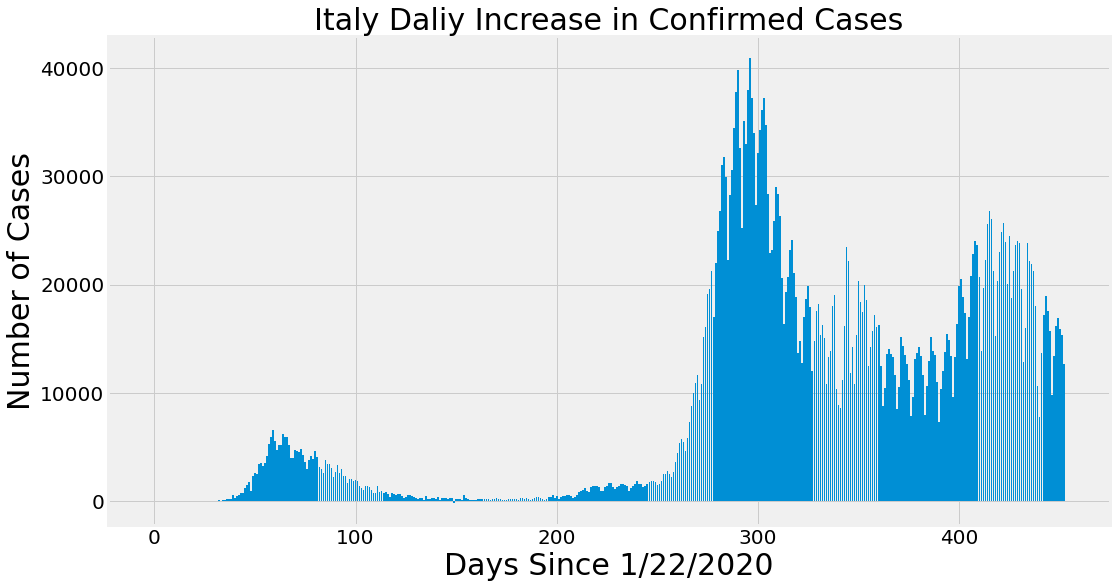

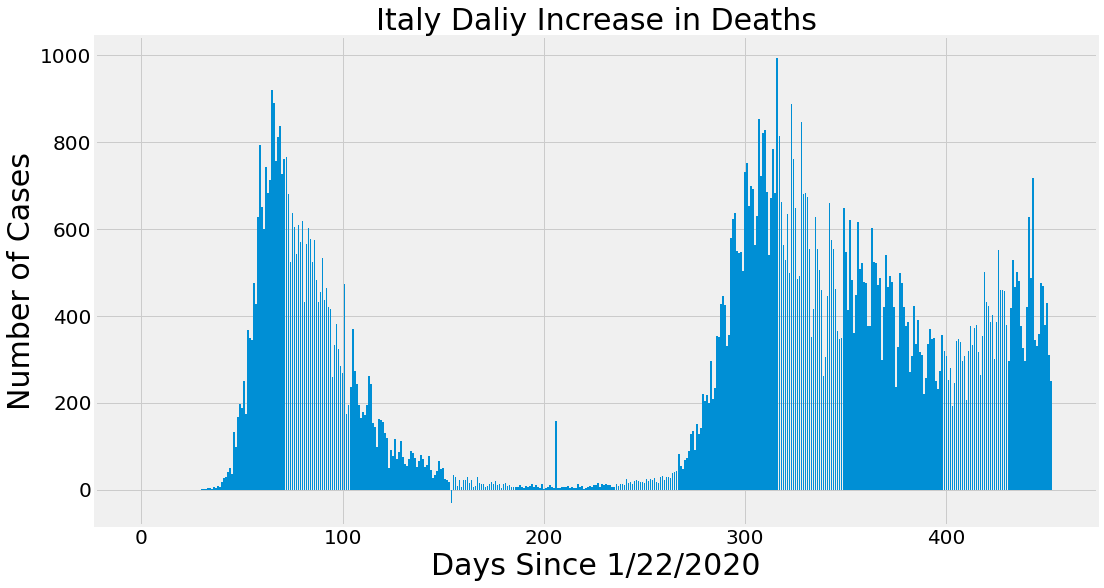

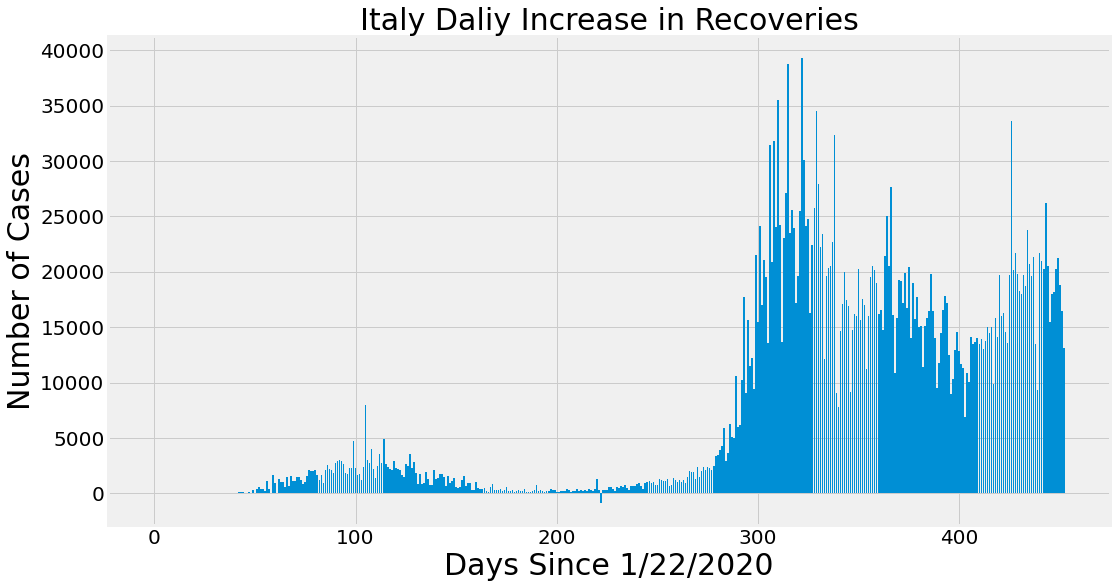

In [66]:
country_plot(adjusted_dates, italy_cases, itlay_daily_increase, itlay_daily_death, itlay_daily_recovery, 'Italy')

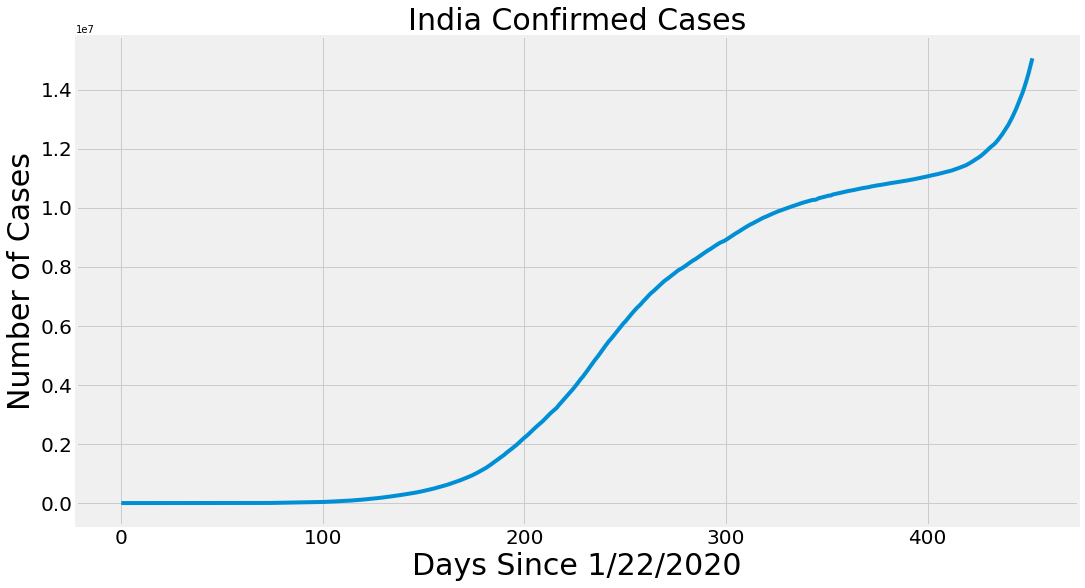

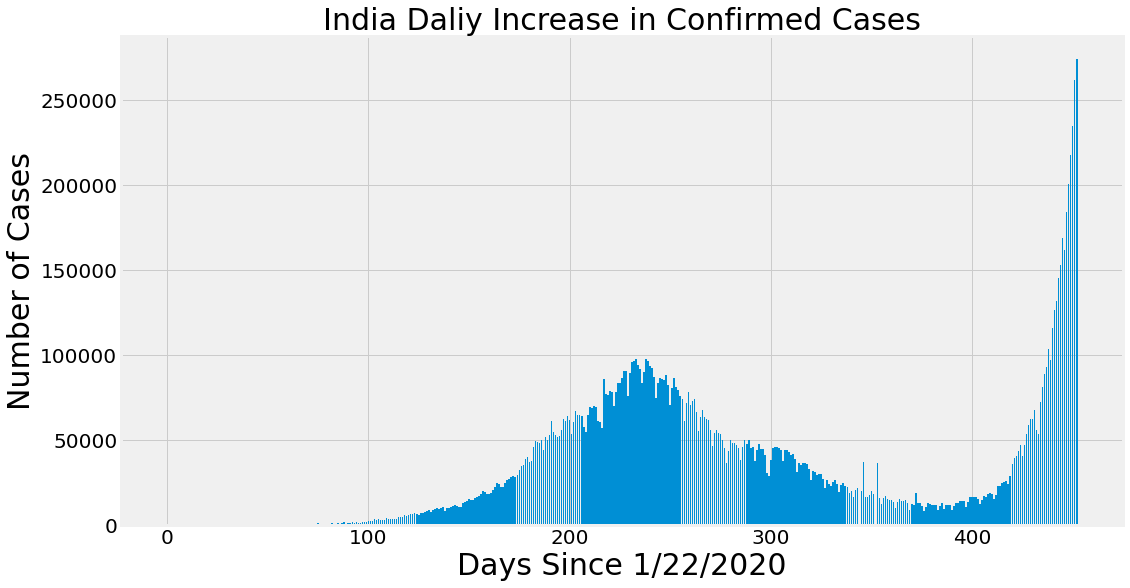

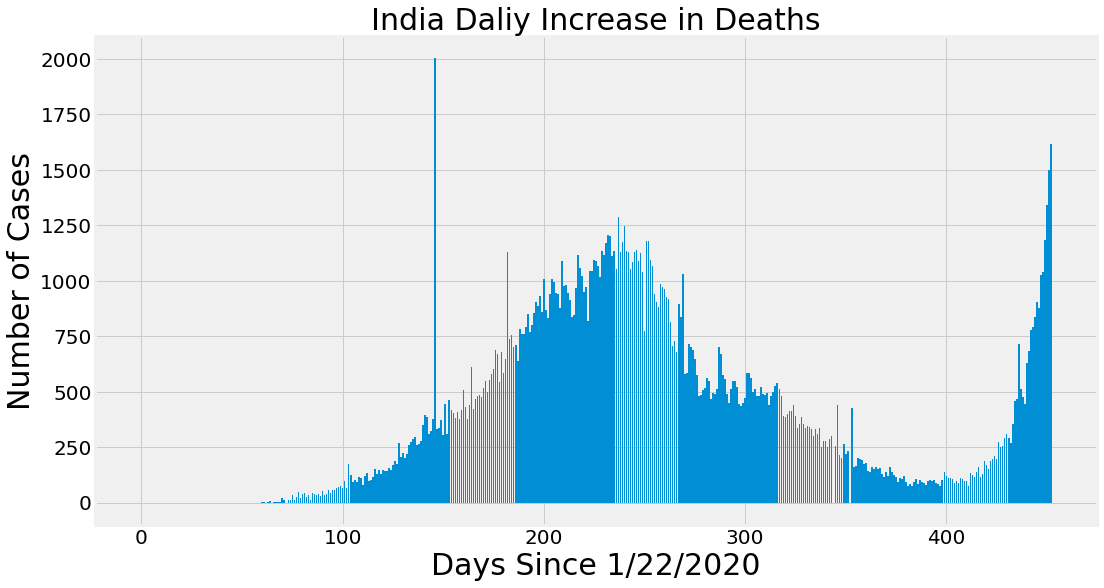

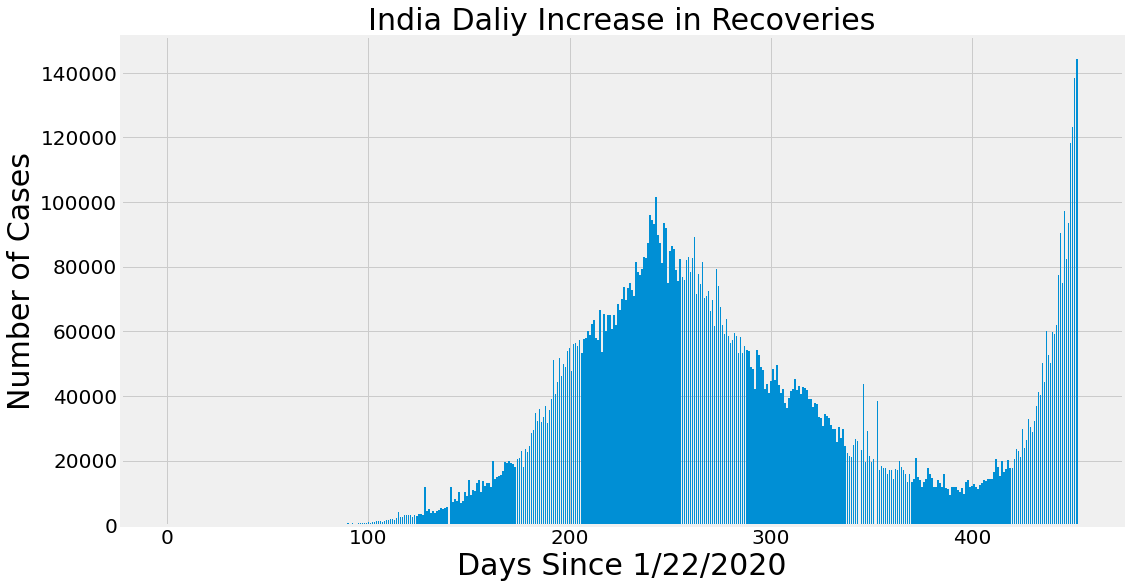

In [67]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

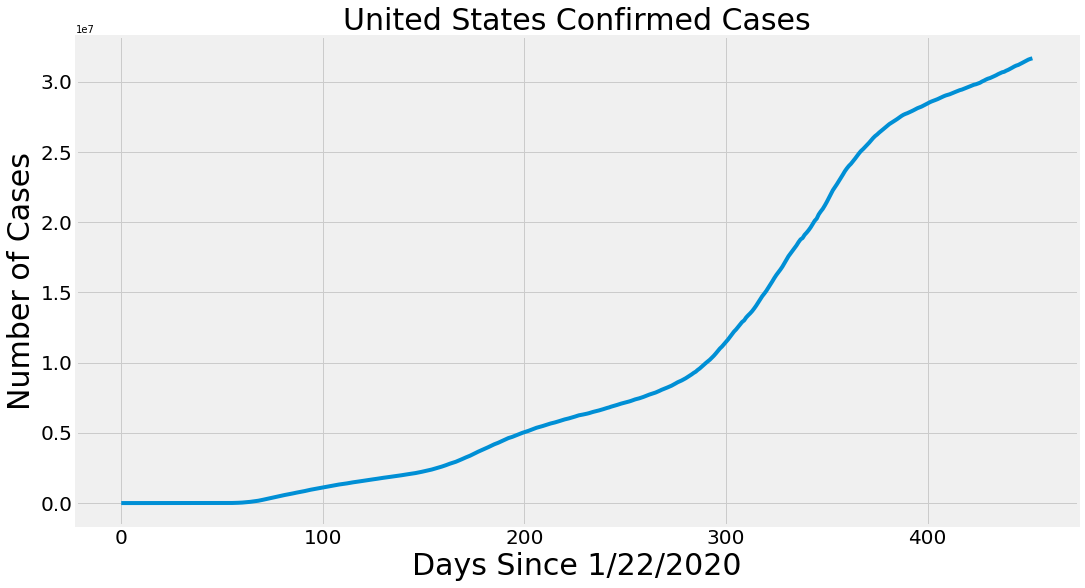

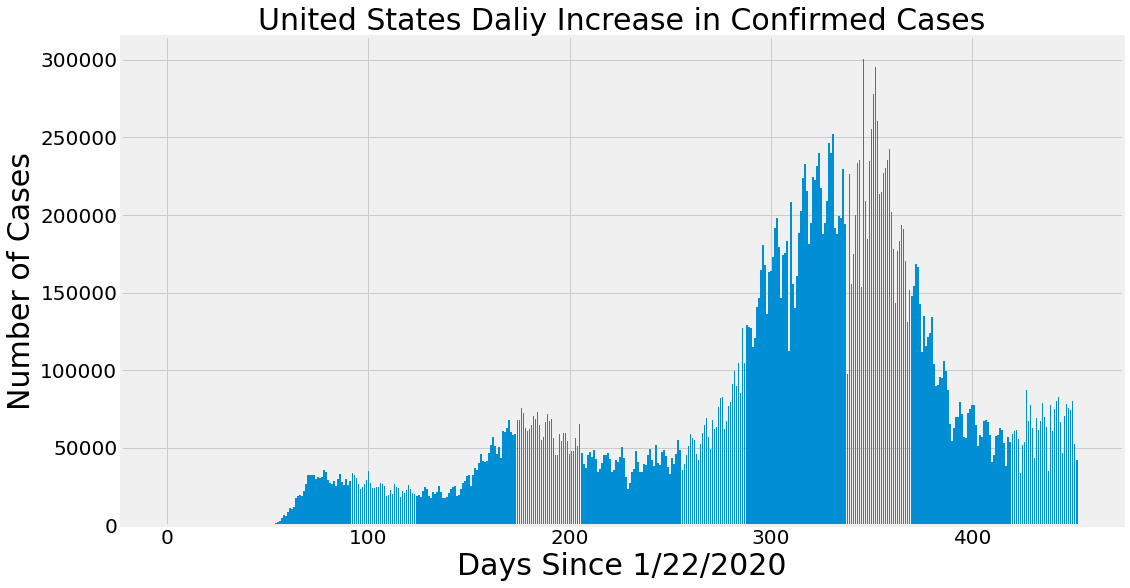

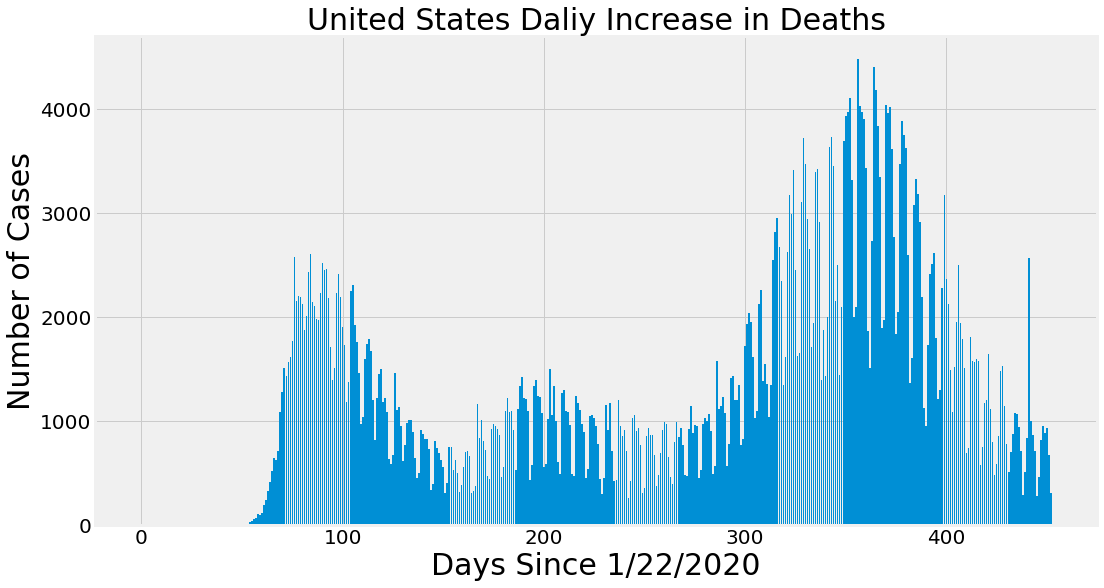

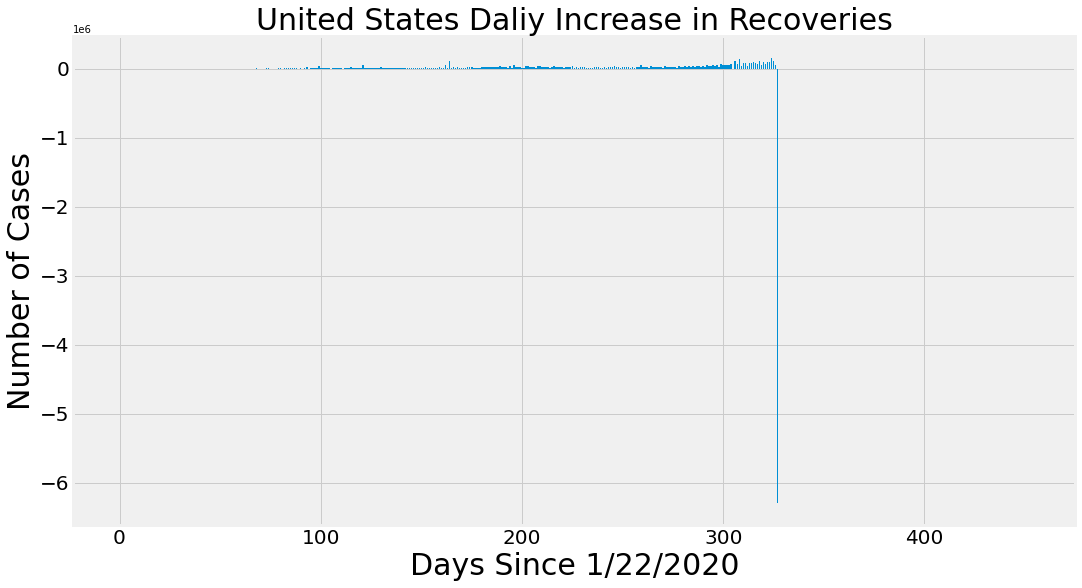

In [68]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

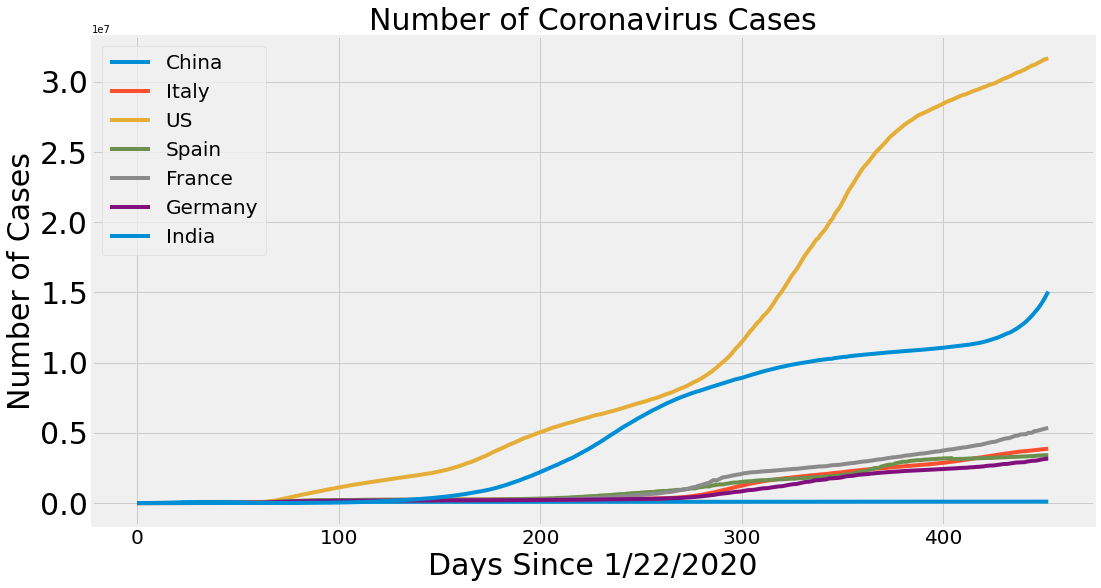

In [69]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=30)
plt.show()

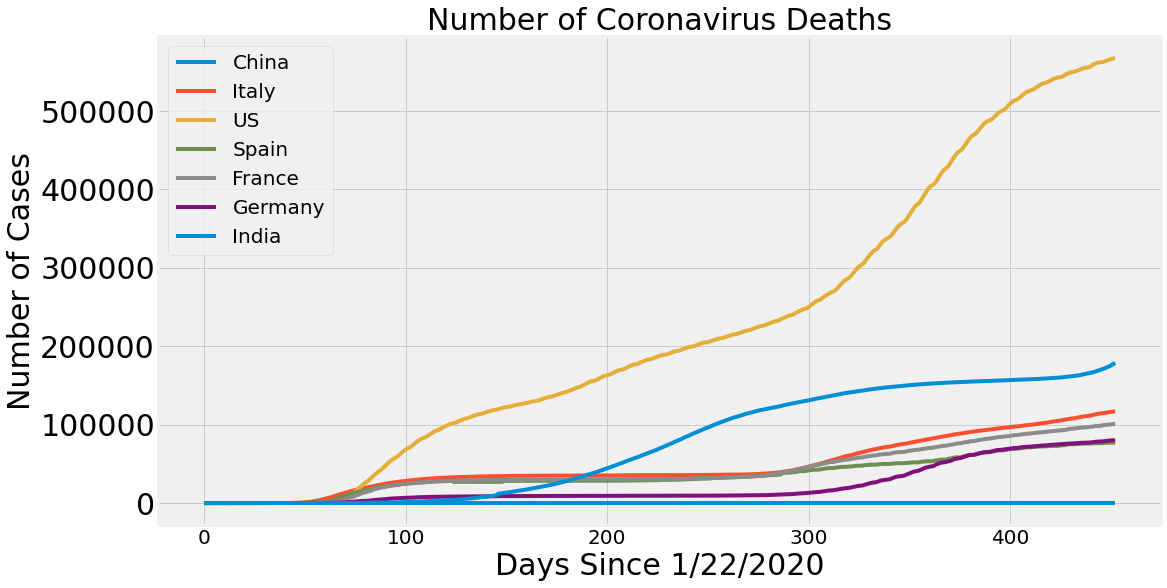

In [70]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=30)
plt.show()

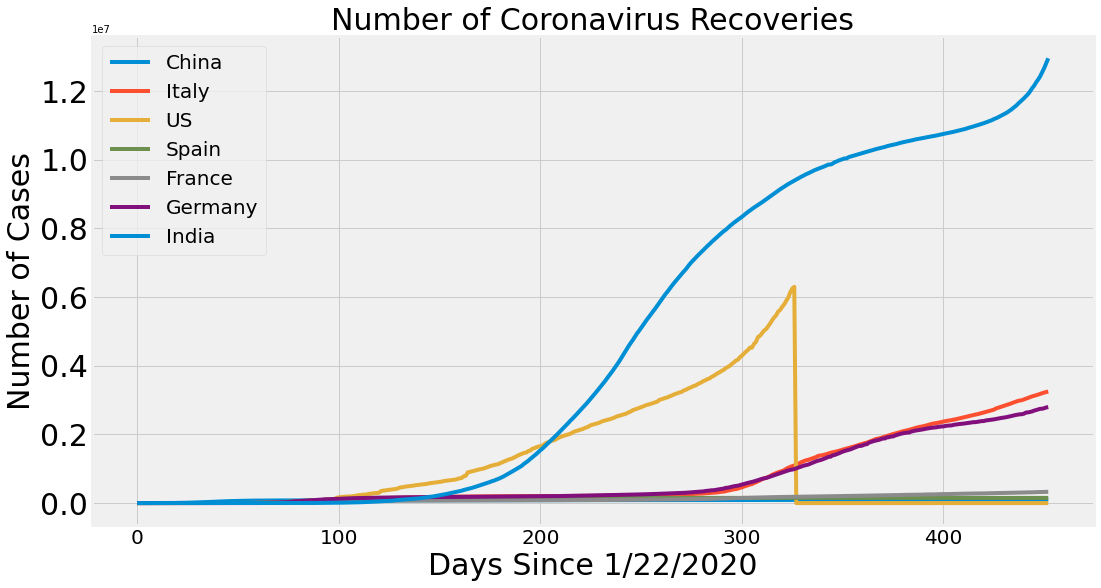

In [71]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'],prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=30)
plt.show()